<h1 align="center"> Statistiques Multivariées (DS): Projet de reconnaissance vocale </h1>

Consignes:
----------
- Deadline: *Dimanche 10 Novembre 23h59* | tout retard d'1h = -1
- Il faut nommer le fichier avec le numéro du groupe seulement: ex "groupe_4.ipynb"
- PAS DE PDF NI DE FICHIER WORD. UN NOTEBOOK UNIQUEMENT.
- Les noms des membres du groupe sont à mentionner en modifiant la ligne suivante:

Membre 1: EL HADJI ATIKA

Membre 2: AIT MOULAY BBIH OTMAN

Membre 3: EN-NASRY SALMA

Membre 4: AMRANI HOSSAM

- Ce notebook contient 10 questions + une question bonus.
- Il faut executer tout le notebook (Run all cells) avant de l'envoyer: vérifier que les cellules sont exécutées dans le bon ordre et qu'il n'y a pas d'erreur, je ne vais pas débugger votre code. 
- Le code doit être propre et lisible et surtout comprendre ce qu'il fait par tous les membres du groupe.
- LIVRAISON UNIQUEMENT SUR DROPBOX (TOUT FICHIER ENVOYE PAR MAIL NE SERA PAS OUVERT):

   https://www.dropbox.com/request/fPpGIeywHPow125tCWzo

   Vous pouvez effectuer plusieurs uploads, seule la date la plus récente sera corrigée.


# Installation
Commencer d'abord par installer les packages nécessaires en lançant dans un terminal:
- `pip install -r requirements.txt`

Ou directement dans une cellule notebook:

- `%pip install -r requirements.txt`

# Les données:
Le dossier "data/raw" contient des milliers d'enregistrements audio de 10 personnes (5 hommes et 5 femmes) américaines. Le but de ce projet et d'analyser ces données et de construire un modèle simple de reconnaissance vocale. C'est à dire, reconnaitre la personne qui parle parmi les 10. Voici à quoi ressemble un enregistrement:

In [21]:

from IPython.display import Audio
import librosa

y1, sr1 = librosa.load("Desktop\voice recognition\project_starter/f0001_us_f0001_00001.wav", sr=None)
Audio(data=y1, rate=sr1)



<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\otman\AppData\Local\Temp\ipykernel_15052\619575664.py:4: SyntaxWarning: invalid escape sequence '\p'
  y1, sr1 = librosa.load("Desktop\voice recognition\project_starter/f0001_us_f0001_00001.wav", sr=None)


ModuleNotFoundError: No module named 'audioop'

In [8]:
print(y1)
print(f"La taille du fichier audio est {y1.shape}")

NameError: name 'y1' is not defined

Nous allons commencer par extraire des informations sur le timbre (en utilisant le domaine temps-fréquence) de l'enregistrement avec les Mel Frequency Cepstral Coefficient (MFCC):

In [85]:
mfcc = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)
print(mfcc)
print(f"La taille des coefficients est {mfcc.shape}")

[[-676.00336   -628.5445    -630.0368    ... -587.2241    -618.89246
  -651.83386  ]
 [  37.224       47.902386    46.27678   ...   56.47776     54.10054
    50.65921  ]
 [  23.1025      21.160934    22.697376  ...   15.998568    18.138079
    22.942192 ]
 ...
 [   6.695296     6.1194553    2.1517367 ...   12.616104     8.677282
     9.154581 ]
 [   6.19289      1.8975844    1.6943827 ...   17.547226    14.119267
    11.321548 ]
 [  -1.1161003   -5.9224443   -5.273529  ...    8.176835     5.3311367
     3.854657 ]]
La taille des coefficients est (10, 147)


On peut visualiser ces 10 coefficients dans le temps:

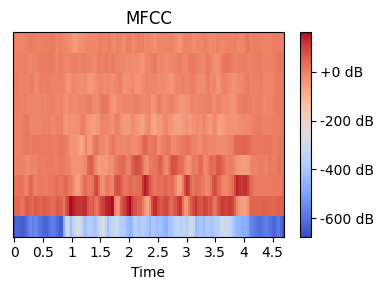

In [86]:
from matplotlib import pyplot as plt

# Plotting the MFCCs
plt.figure(figsize=(4, 3))
librosa.display.specshow(mfcc, x_axis='time', sr=sr1)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()


Nous allons résumer ces coefficients en calculant leur moyenne temporelle. Ainsi, chaque fichier audio doit être transformé par un vecteur de taille 13:

In [87]:
mfcc_moyenne = mfcc.mean(axis=1)
mfcc_moyenne

array([-447.81406  ,   63.020832 ,   30.160309 ,    7.9655695,
          2.1016788,  -22.293121 ,   -7.862449 ,  -12.084611 ,
         -1.8244218,   -6.8137836], dtype=float32)

On construit donc le dataset avec la fonction suivante:


In [88]:
import pandas as pd

folder_path = "data/raw/"
n_recordings = 50
n_coefs = 10
data = []
for gender in ["m", "f"]:
    for speaker in range(1, 6):
        for recording_id in range(1, n_recordings + 1):
            file_name = "%s%04d_us_%s%04d_%05d.wav" %(gender, speaker, gender, speaker, recording_id)
            y, sr = librosa.load(folder_path + file_name)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coefs).mean(axis=1)

            speaker_id = speaker - 1
            if gender == "f":
                speaker_id += 5
            row_data = {
                'FileName': file_name,
                'Gender': gender,
                'SpeakerID': speaker_id,
                'RecordingID': recording_id,
            }
            for i in range(n_coefs):
                row_data[f'MFCC_{i+1}'] = mfcc[i]
            
            data.append(row_data)

df = pd.DataFrame(data)

In [89]:
df.head()

,FileName,Gender,SpeakerID,RecordingID,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10
0,m0001_us_m0001_00001.wav,m,0,1,-432.045410,119.769264,-3.836545,25.336601,-13.802796,16.731417,-2.733351,2.620322,-9.290769,3.606286
1,m0001_us_m0001_00002.wav,m,0,2,-448.635986,114.177414,-5.153250,16.764275,-20.626694,20.666159,-5.741007,9.305303,-5.688131,0.833428
2,m0001_us_m0001_00003.wav,m,0,3,-433.696320,94.268814,-3.704444,24.321095,-15.773800,16.456261,0.998079,5.189481,-8.003875,4.879942
3,m0001_us_m0001_00004.wav,m,0,4,-427.338989,113.769791,-8.063370,25.546103,-15.735123,12.846508,-0.483539,5.328898,-16.783321,1.889776
4,m0001_us_m0001_00005.wav,m,0,5,-412.676575,102.270454,-9.136461,29.005512,-12.034924,23.754642,-7.142555,-0.976251,-14.627462,3.513205


# Partie I:
#### 1. Effectuez une PCA sur les coefficients MFCC en visualisant le genre avec deux couleurs différentes. 


In [90]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [91]:
mfcc_features = df[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 
                      'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10']]

scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_features)

pca = PCA()
mfcc_pca = pca.fit_transform(mfcc_scaled)

scores = pca.transform(mfcc_scaled)
pca.components_

array([[ 0.00996003,  0.3509846 , -0.19569364, -0.50892454,  0.30324468,
         0.02674513,  0.5107431 , -0.14865665,  0.38678157,  0.23276694],
       [ 0.5789287 ,  0.19866891, -0.5231557 ,  0.05476432, -0.1391207 ,
        -0.32581857, -0.02409238, -0.3496285 , -0.3028218 , -0.09299107],
       [ 0.17783566,  0.3706879 , -0.13772205, -0.13997781, -0.28131002,
         0.49276498, -0.14055996,  0.48191306, -0.26797172,  0.38294256],
       [-0.14301592, -0.29382694, -0.14277153, -0.10860281, -0.54824257,
        -0.38250008, -0.10279576, -0.03225089,  0.29758865,  0.56034946],
       [-0.37489247,  0.31784663, -0.32181177,  0.43483117,  0.12906092,
         0.27438563, -0.3572306 , -0.4078399 ,  0.21476632,  0.18377255],
       [ 0.00067281,  0.20721738, -0.29081824,  0.1821643 ,  0.2484408 ,
        -0.42931467, -0.19139524,  0.6482528 ,  0.33493996, -0.15562433],
       [ 0.26238263, -0.5168766 , -0.18581863,  0.26686257,  0.5246122 ,
         0.12389286,  0.11680152,  0.09437289

In [92]:
%%capture
fig, axes = plt.subplots(1,2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,pca.explained_variance_ratio_,marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

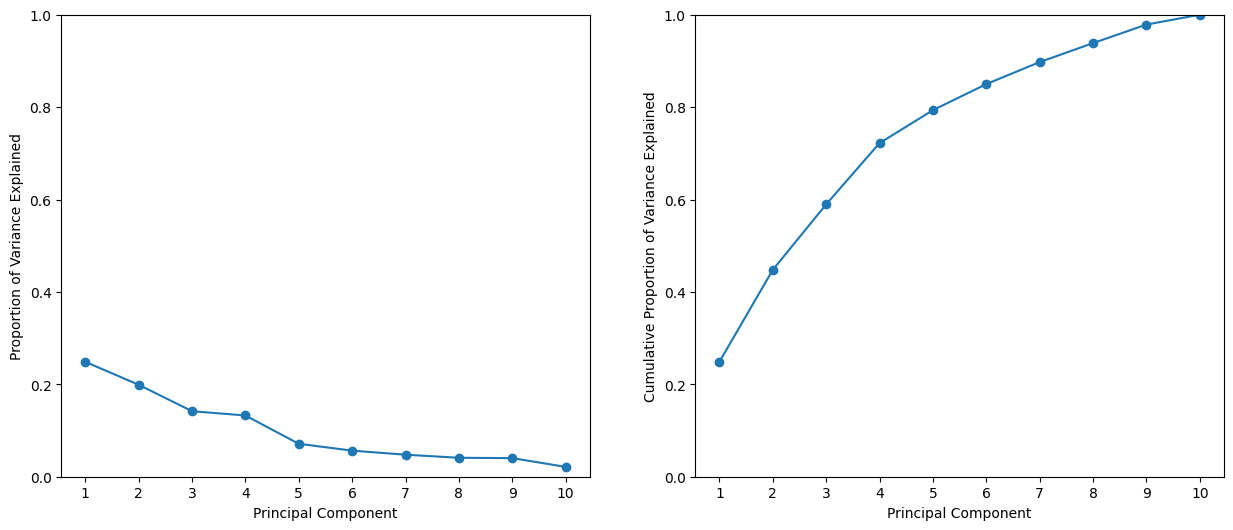

In [93]:
ax = axes[1]
ax.plot(ticks,pca.explained_variance_ratio_.cumsum(),marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [94]:
pca.explained_variance_ratio_.cumsum()

array([0.24862565, 0.44765052, 0.5894869 , 0.7220367 , 0.79332376,
       0.84980166, 0.8974633 , 0.9384848 , 0.97867453, 1.        ],
      dtype=float32)

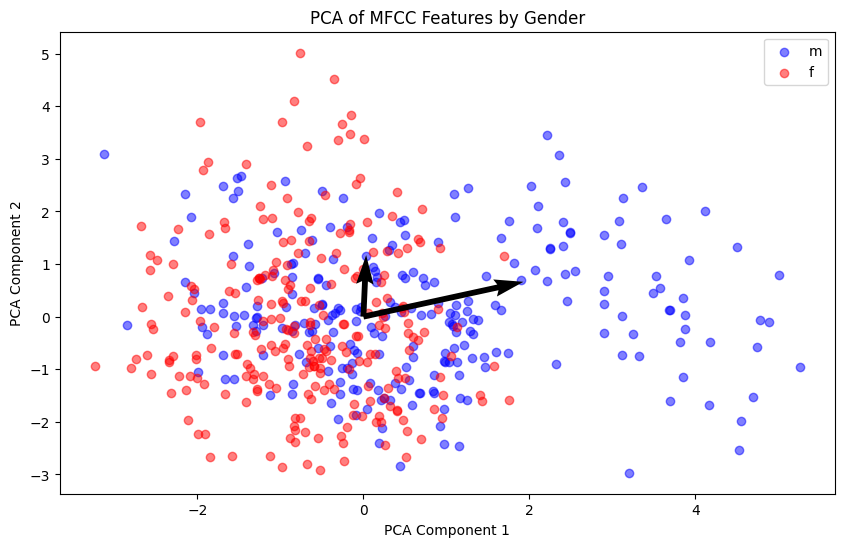

In [95]:
df['PCA1'] = mfcc_pca[:, 0]
df['PCA2'] = mfcc_pca[:, 1]

plt.figure(figsize=(10, 6))

for gender, color in zip(['m', 'f'], ['blue', 'red']):
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=gender, color=color, alpha=0.5)
    


scale = 0.3
origin = np.zeros(2)

for i, (vector) in enumerate(pca.components_[:2]):  
    plt.quiver(origin[0], origin[1], vector[0], vector[1], angles='xy', scale_units='xy', scale=scale, color='black')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of MFCC Features by Gender')
plt.legend()
plt.show()

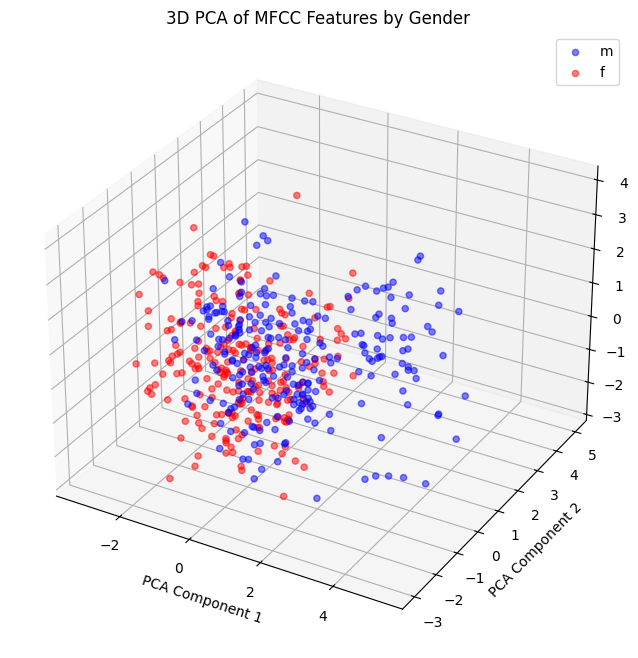

In [96]:
df['PCA3'] = mfcc_pca[:, 2]


pca = PCA(n_components=3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for gender, color in zip(['m', 'f'], ['blue', 'red']):
    subset = df[df['Gender'] == gender]
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'], label=gender, color=color, alpha=0.5)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA of MFCC Features by Gender')
plt.legend()
plt.show()

In [97]:
df['PCA4'] = mfcc_pca[:, 3]
df['PCA5'] = mfcc_pca[:, 4]
df['PCA6'] = mfcc_pca[:, 5]

#### 3. Proposez une analyse statistique (et effectuez la) pour évaluer si différence entre les hommes et les femmes est significative. 


In [100]:

def analyze_gender_differences(data):
   
    
    male_data = data[data['Gender'] == 'm'][['PCA' + str(i) for i in range(1, 7)]].values
    female_data = data[data['Gender'] == 'f'][['PCA' + str(i) for i in range(1, 7)]].values
    
    
    def hotelling_t2(X, Y):
        n1 = X.shape[0]
        n2 = Y.shape[0]
        d = X.shape[1]
        
        
        mean_x = np.mean(X, axis=0)
        mean_y = np.mean(Y, axis=0)
        
        S_x = np.cov(X, rowvar=False)
        S_y = np.cov(Y, rowvar=False)
        S_pooled = ((n1-1)*S_x + (n2-1)*S_y)/(n1+n2-2)
        
        mean_diff = mean_x - mean_y
        T2_stat = (n1*n2)/(n1+n2) * mean_diff.dot(np.linalg.inv(S_pooled)).dot(mean_diff)
        
        f_stat = (n1+n2-d-1)*T2_stat/((n1+n2-2)*d)
        
        df1 = d
        df2 = n1+n2-d-1
        
        p_value = 1 - f.cdf(f_stat, df1, df2)
        
        return T2_stat, f_stat, p_value
    
    t2_stat, f_stat, p_value = hotelling_t2(male_data, female_data)
    
    #________________________________________________________________________________________________________#
    
    # 2. for each PCA component
    univariate_results = []
    for i in range(6):
        t_stat, p_val = stats.ttest_ind(male_data[:, i], female_data[:, i])
        univariate_results.append({
            'PCA': f'PCA{i+1}',
            't_statistic': t_stat,
            'p_value': p_val,
        })
    
    return {
        'hotelling_t2': t2_stat,
        'hotelling_f': f_stat,
        'hotelling_p': p_value,
        'univariate_tests': pd.DataFrame(univariate_results)
    }


In [101]:

resultats = analyze_gender_differences(df)

print(f"Test de Hotelling T2:")
print(f"Statistique T2: {resultats['hotelling_t2']:.2f}")
print(f"Statistique F: {resultats['hotelling_f']:.2f}")
print(f"P-value: {resultats['hotelling_p']:.4f}")

print("\nTests univariés pour chaque PCA:")
print(resultats['univariate_tests'])



Test de Hotelling T2:
Statistique T2: 1820.35
Statistique F: 300.35
P-value: 0.0000

Tests univariés pour chaque PCA:
    PCA  t_statistic       p_value
0  PCA1    10.850059  9.157573e-25
1  PCA2     1.836611  6.686317e-02
2  PCA3     4.700289  3.367134e-06
3  PCA4   -21.256918  7.704427e-72
4  PCA5    -4.871158  1.492939e-06
5  PCA6    -3.469430  5.668321e-04


#### 4. Compte tenu de ce résultat, comment peut-on implémenter un modèle de prédiction (avec numpy seulement) du sexe basé sur le calcul d'une distance ? 


In [102]:
df.columns

Index(['FileName', 'Gender', 'SpeakerID', 'RecordingID', 'MFCC_1', 'MFCC_2',
       'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9',
       'MFCC_10', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'],
      dtype='object')

In [103]:
import numpy as np

def calculate_mahalanobis_distance(x, mean, cov_inv):
    
    diff = x - mean
    return np.sqrt(diff.T.dot(cov_inv).dot(diff))

def train_mahalanobis_classifier(X_train, y_train):
    
    X_male = X_train[y_train == 'm']
    X_female = X_train[y_train == 'f']
    
    mean_male = np.mean(X_male, axis=0)
    
    mean_female = np.mean(X_female, axis=0)
    
    cov_male = np.cov(X_male.T)
    cov_female = np.cov(X_female.T)
    
    cov_inv_male = np.linalg.inv(cov_male)
    cov_inv_female = np.linalg.inv(cov_female)
    
    return {
        'm': {'mean': mean_male, 'cov_inv': cov_inv_male},
        'f': {'mean': mean_female, 'cov_inv': cov_inv_female}
    }

def predict_gender(X, model_params):
    
    predictions = []
    
    for x in X:
        dist_male = calculate_mahalanobis_distance(
            x, 
            model_params['m']['mean'],
            model_params['m']['cov_inv']
        )
        dist_female = calculate_mahalanobis_distance(
            x,
            model_params['f']['mean'],
            model_params['f']['cov_inv']
        )
        
        predictions.append('m' if dist_male < dist_female else 'f')
    
    return np.array(predictions)

def evaluate_model(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

In [104]:
mfcc_columns = ['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 
                'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10']
X = df[mfcc_columns].values
y = df['Gender'].values

mask = np.random.rand(len(df)) < 0.8
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

model_params = train_mahalanobis_classifier(X_train, y_train)


y_pred = predict_gender(X_test, model_params)

accuracy = evaluate_model(y_test, y_pred)

print(f"Précision du modèle: {accuracy:.2%}")

Précision du modèle: 98.21%


# Partie II: Reconnaissance vocale
On souhaite désormais apprendre à prédire `Y = speaker_id` avec les données `X = MFCCS` en utilisant des modèles de classification (avec scikit-learn). On découpe le dataset en deux parties:
- `(X_train, y_train)`: utilisé pour "entrainer" le modèle, c-à-d on suppose que les `y_train` sont connues.
- `(X_train, y_test)`: utilisé pour "tester" le modèle, c-à-d on suppose que les `y_train` ne sont pas connues à l'avance et sont utilisés uniquement après avoir entrainé le modèle pour l'évaluer.


In [105]:
from sklearn.model_selection import train_test_split

X = df[[f"MFCC_{i}" for i in range(1, 11)]].values
y = df.SpeakerID.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.25)

#### 5. Évaluez la performance du modèle Naive Bayes en terme de précision de prédiction sur le train et le test. 

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.62      0.50      0.56        10
           2       0.64      0.75      0.69        12
           3       0.60      0.69      0.64        13
           4       0.86      0.80      0.83        15
           5       0.73      0.73      0.73        11
           6       0.70      0.47      0.56        15
           7       0.62      0.77      0.69        13
           8       0.75      0.69      0.72        13
           9       0.79      1.00      0.88        11

    accuracy                           0.73       125
   macro avg       0.73      0.73      0.73       125
weighted avg       0.73      0.73      0.72       125



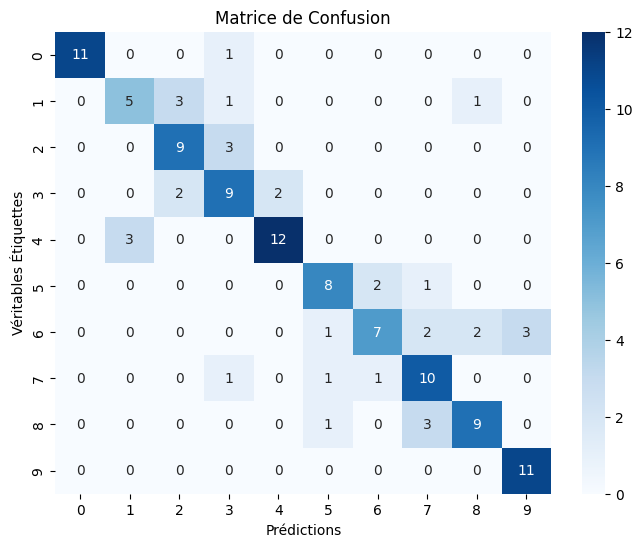

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

model = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print("Rapport de classification :")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()


accuracy-score=0.73 signifie que 73 %  des prédiction des modéle sont correctes. on peut dire  elle est bonne mais elle montre que le modéle fait encore des erreurs significatives (27 %) 

on sait que le modéle Naive Bays repose sur l'hypothése de l'indépendance conditionnelle des caractéristiques , dans notre cas les variables caractéristques sont des coefficient MFCC et Ces coefficient sont un extraits d'un signal audio et ils sont souvent corrélès car ils capturent des informations complémentaires sur les fréquences donc cela peut limiter la précision des prédictions. 

l'hypothèse de l'idépendance simplifie les calculs mais limite la capacité du modèle à capturer des relations complexes entre les variables, ce qui peut entraîner des erreurs de classification.

donc on peut utiliser d'autre modéles qui reposent sur l'hypothése d'existence une dépendance entre les caractéristique comme LDA \& QDA pour obtenir une meilleur précision

#### 6. Comparez ses performances avec LDA et QDA. Que pouvez-vous conclure ?


Rapport de classification pour LDA :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      0.60      0.63        10
           2       0.86      1.00      0.92        12
           3       0.92      0.92      0.92        13
           4       0.86      0.80      0.83        15
           5       0.91      0.91      0.91        11
           6       0.79      0.73      0.76        15
           7       0.73      0.85      0.79        13
           8       0.83      0.77      0.80        13
           9       1.00      1.00      1.00        11

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.85       125



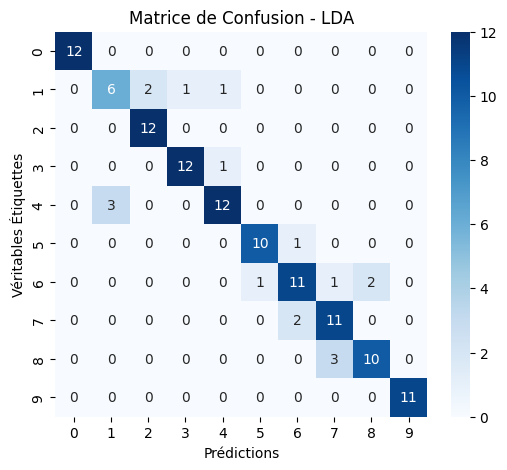


Rapport de classification pour QDA :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.90      0.86        10
           2       1.00      0.83      0.91        12
           3       0.80      0.92      0.86        13
           4       0.93      0.93      0.93        15
           5       0.75      0.82      0.78        11
           6       0.78      0.93      0.85        15
           7       0.91      0.77      0.83        13
           8       1.00      0.77      0.87        13
           9       1.00      1.00      1.00        11

    accuracy                           0.89       125
   macro avg       0.90      0.89      0.89       125
weighted avg       0.90      0.89      0.89       125



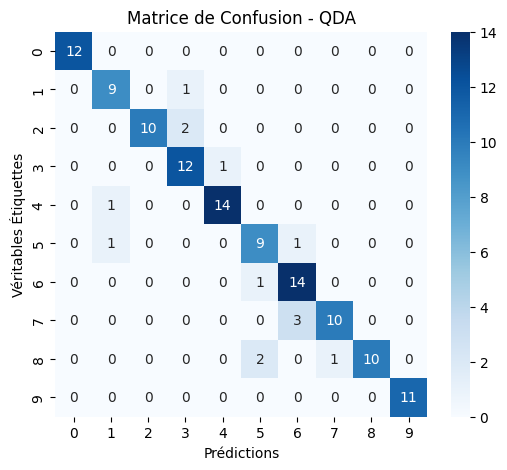

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()

lda_model.fit(X_train, y_train)
qda_model.fit(X_train, y_train)

y_lda_pred = lda_model.predict(X_test)
y_qda_pred = qda_model.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    print(f"\nRapport de classification pour {model_name} :")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.xlabel('Prédictions')
    plt.ylabel('Véritables Étiquettes')
    plt.show()

evaluate_model(y_test, y_lda_pred, "LDA")
evaluate_model(y_test, y_qda_pred, "QDA")


on observe qu'on a des résultats mieux que le modéle de Naive Bays car cet derniere est limiter par l'hypothése de l'indépendance des carctéristique ce qui réduit sa capacité à modéliser des relation complexe entre les caractéristique 
on a aussi une différence entre le modéle LDA et QDA :

LDA : améliore les résultats grace à la présence de la matrice de covariance qui capture les corrélations entre les caractéristiques mais il reste aussi limiter par l'ypoyhése de frontiére lineaire 

QDA: entre ces trois modéle QDA est le meilleur car il modélise des frontiére de desicion non linéaire (quadratique)

#### 7. On souhaite à présent modéliser la distribution de chaque speaker par un mélange de Gaussiennes. Comment peut-on faire des prédictions avec un tel modèle ?

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      1.00      0.91        10
           2       1.00      0.83      0.91        12
           3       0.85      0.85      0.85        13
           4       0.88      0.93      0.90        15
           5       0.90      0.82      0.86        11
           6       0.79      1.00      0.88        15
           7       0.85      0.85      0.85        13
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00        11

    accuracy                           0.90       125
   macro avg       0.91      0.90      0.90       125
weighted avg       0.91      0.90      0.89       125



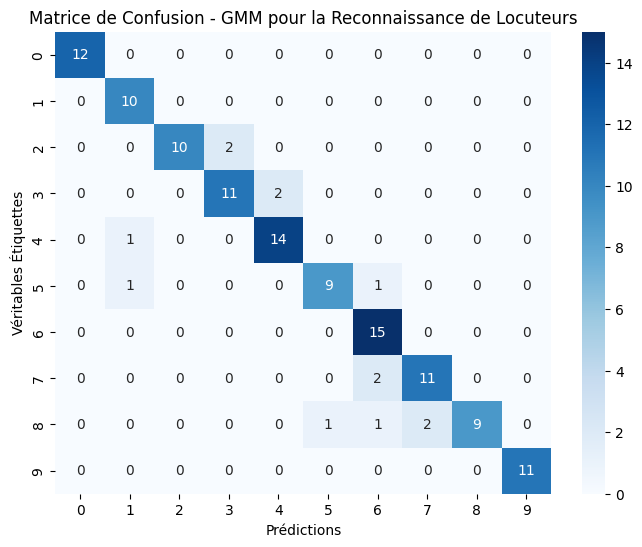

In [108]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

n_components = 2
speakers = np.unique(y_train)

gmm_models = {}
for speaker in speakers:
    gmm = GaussianMixture(n_components=n_components, covariance_type='tied', random_state=0)
    gmm.fit(X_train[y_train == speaker])
    gmm_models[speaker] = gmm

def predict_speaker(x):
    scores = {speaker: gmm.score([x]) for speaker, gmm in gmm_models.items()}
    return max(scores, key=scores.get)

y_pred = [predict_speaker(x) for x in X_test]

print("Rapport de classification :")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=speakers, yticklabels=speakers)
plt.title('Matrice de Confusion - GMM pour la Reconnaissance de Locuteurs')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()


#### 8. Comparez les performances du mélange de Gaussienens en essayant plusieurs combinaisaisons de ses arguments (`n_components` et `covariance_type`). Que pouvez-vous conclure ?

n_components: 1, covariance_type: full
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.90      0.86        10
           2       1.00      0.83      0.91        12
           3       0.80      0.92      0.86        13
           4       0.93      0.93      0.93        15
           5       0.75      0.82      0.78        11
           6       0.74      0.93      0.82        15
           7       0.91      0.77      0.83        13
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00        11

    accuracy                           0.88       125
   macro avg       0.89      0.88      0.88       125
weighted avg       0.89      0.88      0.88       125



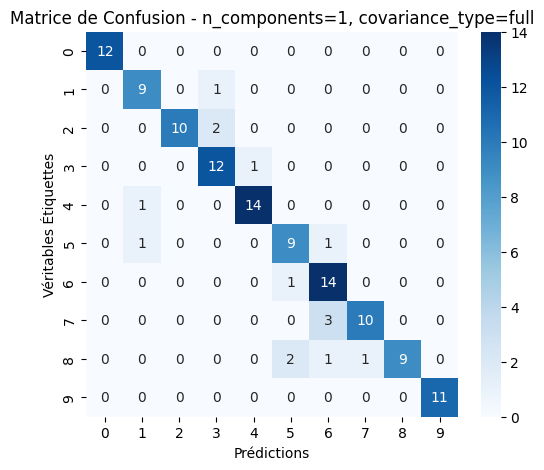

n_components: 1, covariance_type: tied
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.90      0.86        10
           2       1.00      0.83      0.91        12
           3       0.80      0.92      0.86        13
           4       0.93      0.93      0.93        15
           5       0.75      0.82      0.78        11
           6       0.74      0.93      0.82        15
           7       0.91      0.77      0.83        13
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00        11

    accuracy                           0.88       125
   macro avg       0.89      0.88      0.88       125
weighted avg       0.89      0.88      0.88       125



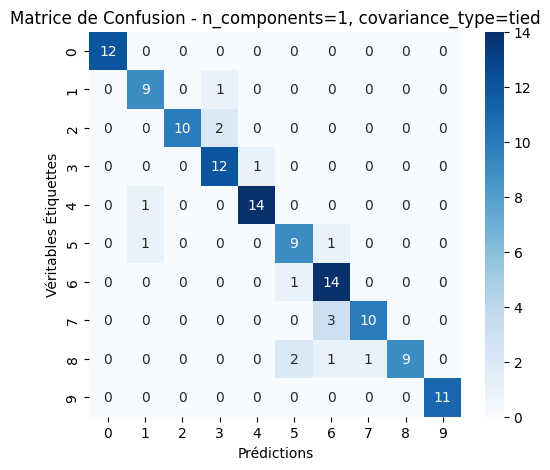

n_components: 1, covariance_type: diag
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.71      0.50      0.59        10
           2       0.64      0.75      0.69        12
           3       0.60      0.69      0.64        13
           4       0.87      0.87      0.87        15
           5       0.73      0.73      0.73        11
           6       0.70      0.47      0.56        15
           7       0.62      0.77      0.69        13
           8       0.75      0.69      0.72        13
           9       0.79      1.00      0.88        11

    accuracy                           0.74       125
   macro avg       0.74      0.74      0.73       125
weighted avg       0.74      0.74      0.73       125



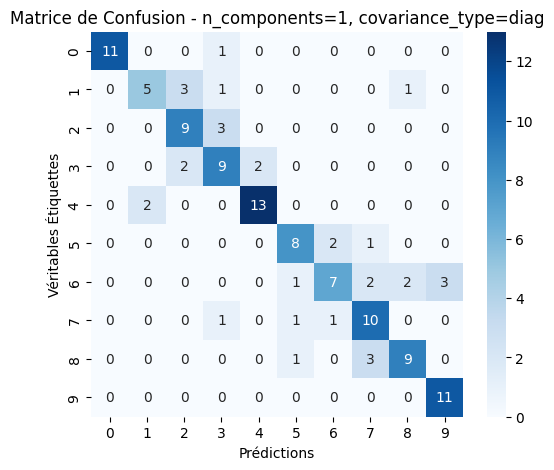

n_components: 1, covariance_type: spherical
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.36      0.40      0.38        10
           2       0.39      0.75      0.51        12
           3       0.60      0.23      0.33        13
           4       0.58      0.73      0.65        15
           5       0.38      0.27      0.32        11
           6       0.50      0.13      0.21        15
           7       0.48      0.85      0.61        13
           8       0.60      0.46      0.52        13
           9       0.89      0.73      0.80        11

    accuracy                           0.54       125
   macro avg       0.56      0.55      0.52       125
weighted avg       0.56      0.54      0.52       125



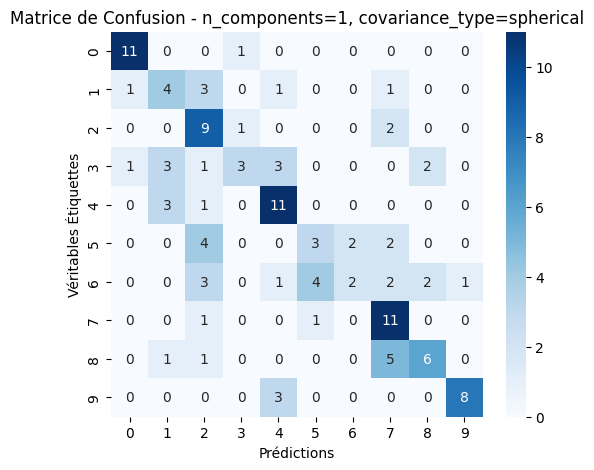

n_components: 2, covariance_type: full
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.80      0.80        10
           2       1.00      0.83      0.91        12
           3       0.61      0.85      0.71        13
           4       0.75      0.80      0.77        15
           5       0.64      0.82      0.72        11
           6       0.73      0.53      0.62        15
           7       0.91      0.77      0.83        13
           8       0.82      0.69      0.75        13
           9       0.92      1.00      0.96        11

    accuracy                           0.80       125
   macro avg       0.82      0.81      0.81       125
weighted avg       0.81      0.80      0.80       125



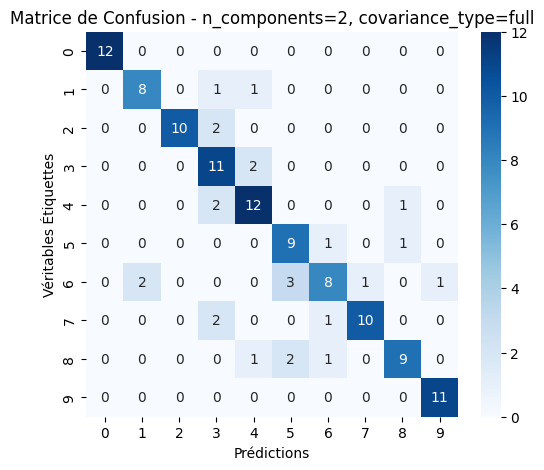

n_components: 2, covariance_type: tied
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      1.00      0.91        10
           2       1.00      0.83      0.91        12
           3       0.85      0.85      0.85        13
           4       0.88      0.93      0.90        15
           5       0.90      0.82      0.86        11
           6       0.79      1.00      0.88        15
           7       0.85      0.85      0.85        13
           8       1.00      0.69      0.82        13
           9       1.00      1.00      1.00        11

    accuracy                           0.90       125
   macro avg       0.91      0.90      0.90       125
weighted avg       0.91      0.90      0.89       125



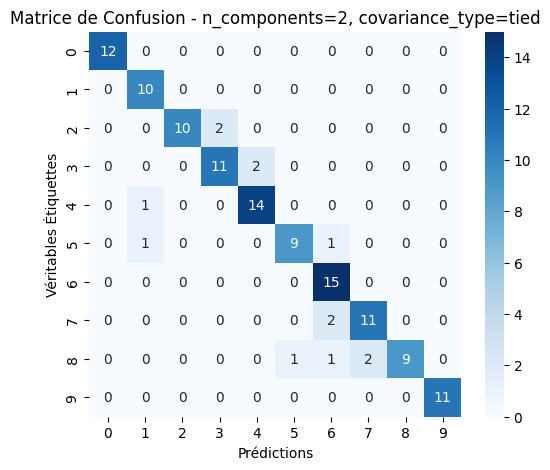

n_components: 2, covariance_type: diag
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.70      0.78        10
           2       1.00      0.75      0.86        12
           3       0.63      0.92      0.75        13
           4       0.93      0.93      0.93        15
           5       0.75      0.82      0.78        11
           6       0.73      0.53      0.62        15
           7       0.79      0.85      0.81        13
           8       0.64      0.54      0.58        13
           9       0.79      1.00      0.88        11

    accuracy                           0.80       125
   macro avg       0.81      0.80      0.80       125
weighted avg       0.81      0.80      0.80       125



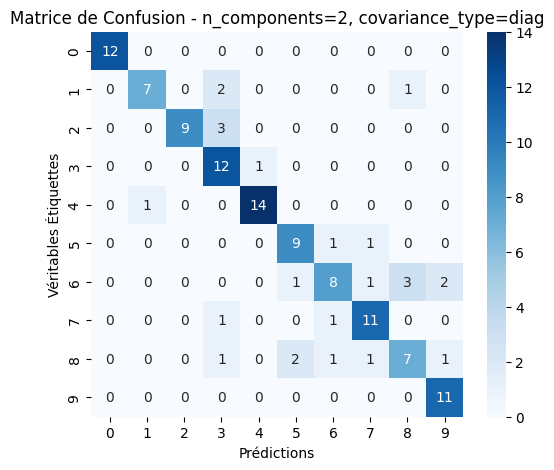

n_components: 2, covariance_type: spherical
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.33      0.40      0.36        10
           2       0.60      0.75      0.67        12
           3       0.33      0.31      0.32        13
           4       0.67      0.53      0.59        15
           5       0.70      0.64      0.67        11
           6       0.50      0.60      0.55        15
           7       0.76      1.00      0.87        13
           8       0.67      0.62      0.64        13
           9       0.80      0.36      0.50        11

    accuracy                           0.62       125
   macro avg       0.63      0.61      0.61       125
weighted avg       0.63      0.62      0.61       125



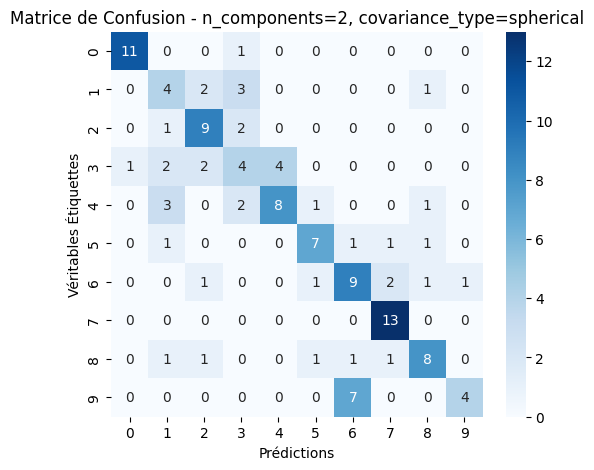

Meilleure combinaison : n_components=2, covariance_type=tied avec F1-score moyen=0.89


In [12]:
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

n_components_list = [1, 2]  # Réduire pour commencer
covariance_types = ['full', 'tied', 'diag', 'spherical']
reg_covar = 1e-2  # Valeur de régularisation plus élevée

best_score = 0
best_params = {}

for n_components in n_components_list:
    for cov_type in covariance_types:
        gmm_models = {}
        for speaker in np.unique(y_train):
            samples = X_train[y_train == speaker]
            if samples.shape[0] > n_components:  # Vérifiez qu'il y a assez d'échantillons
                gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=0, reg_covar=reg_covar)
                gmm.fit(samples)
                gmm_models[speaker] = gmm
            else:
                print(f"Pas assez d'échantillons pour le locuteur {speaker} avec n_components={n_components}.")
        
        # Prédiction
        def predict_speaker(x):
            scores = {speaker: gmm.score([x]) for speaker, gmm in gmm_models.items()}
            return max(scores, key=scores.get)
        
        y_pred = [predict_speaker(x) for x in X_test]
        report = classification_report(y_test, y_pred, output_dict=True)
        avg_f1_score = report['weighted avg']['f1-score']
        
        if avg_f1_score > best_score:
            best_score = avg_f1_score
            best_params = {'n_components': n_components, 'covariance_type': cov_type}

        print(f"n_components: {n_components}, covariance_type: {cov_type}")
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.title(f'Matrice de Confusion - n_components={n_components}, covariance_type={cov_type}')
        plt.xlabel('Prédictions')
        plt.ylabel('Véritables Étiquettes')
        plt.show()

print(f"Meilleure combinaison : n_components={best_params['n_components']}, covariance_type={best_params['covariance_type']} avec F1-score moyen={best_score:.2f}")


#### 9. Comment peut-on utiliser le test du rapport de vraisemlance pour comparer ces modèles ? 

In [35]:
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import chi2

# Ajustement des modèles
gmm_reduit = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm_reduit.fit(X_train)
log_likelihood_reduit = gmm_reduit.score(X_train) * X_train.shape[0]  # Vraisemblance du modèle réduit

gmm_complet = GaussianMixture(n_components=4, covariance_type='tied', random_state=0)
gmm_complet.fit(X_train)
log_likelihood_complet = gmm_complet.score(X_train) * X_train.shape[0]  # Vraisemblance du modèle complet

# Calcul du rapport de vraisemblance
lambda_stat = -2 * (log_likelihood_reduit - log_likelihood_complet)
df = gmm_complet.n_components - gmm_reduit.n_components  # Degrés de liberté

# Calcul de la valeur p
p_value = 1 - chi2.cdf(lambda_stat, df)

# Résultats
print(f"Statistique du rapport de vraisemblance: {lambda_stat:.2f}")
print(f"Degrés de liberté: {df}")
print(f"Valeur p: {p_value:.4f}")

# Conclusion
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Rejeter l'hypothèse nulle : Le modèle complet s'ajuste significativement mieux.")
else:
    print("Ne pas rejeter l'hypothèse nulle : Pas de preuve suffisante que le modèle complet est meilleur.")


Statistique du rapport de vraisemblance: 44.10
Degrés de liberté: 2
Valeur p: 0.0000
Rejeter l'hypothèse nulle : Le modèle complet s'ajuste significativement mieux.


#### 10: Evaluez la performance avec le modèle de classification de votre choix (scikit-learn) et interpretez le résultat. Le meilleur score sur des données de validation (privées) aura une note supplémentaire.


Optimisation pour le modèle: Random Forest
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
374 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa


Optimisation pour le modèle: SVM (RBF)
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Optimisation pour le modèle: SVM (Linear)
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Optimisation pour le modèle: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Optimisation pour le modèle: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Optimisation pour le modèle: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Optimisation pour le modèle: MLP Classifier
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Optimisation pour le modèle: AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\Thinkbook\anaconda3\envs\mon_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Optimisation pour le modèle: Gradient Boosting
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Optimisation pour le modèle: Naive Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits

--- Meilleur Modèle: SVM (Linear) ---
Meilleurs Hyperparamètres: {'C': 0.1, 'kernel': 'linear'}
Meilleure Précision (sur l'entraînement): 0.8693333333333333
Rapport de Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.50      0.40      0.44        10
           2       1.00      0.92      0.96        12
           3       0.71      0.92      0.80        13
           4       0.73      0.73      0.73        15
           5       0.91      0.91      0.91        11
           6       0.82      0.60      0.69        15
           7       0.79      0.85      0.81        13
           8       0.77      0.77      0.77        13
           9       0.85      1.00      0.92        11

    accu

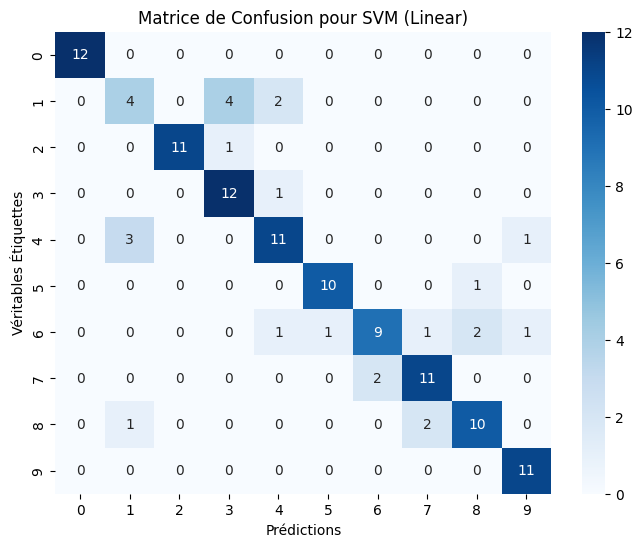

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt


X = df[[f"MFCC_{i}" for i in range(1, 11)]].values  
y = df['SpeakerID'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.25)

# hyperparamètres
models = {
    'Random Forest': (RandomForestClassifier(random_state=0), {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'SVM (RBF)': (SVC(random_state=0), {
        'C': [0.5, 1, 10],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    }),
    'SVM (Linear)': (SVC(random_state=0), {
        'C': [0.1, 1, 10],
        'kernel': ['linear']
    }),
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=0), {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=0), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'MLP Classifier': (MLPClassifier(max_iter=1000, random_state=0), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.001]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=0), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=0), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }),
    'Naive Bayes': (GaussianNB(), {})
}


results = {}

# Tester chaque modèle avec une recherche exhaustive
for model_name, (model, param_grid) in models.items():
    print(f"\nOptimisation pour le modèle: {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
    
    
    grid_search.fit(X_train, y_train)
    
    # Enregistrer les résultats
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'accuracy': grid_search.score(X_test, y_test)
    }

# Trouver le meilleur modèle en utilisant la précision
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model_params = results[best_model_name]['best_params']
best_model = models[best_model_name][0].set_params(**best_model_params)

# Entraîner le meilleur modèle sur l'ensemble d'entraînement
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Générer le rapport de classification
report = classification_report(y_test, y_pred_best)

# Afficher le rapport de classification
print(f"\n--- Meilleur Modèle: {best_model_name} ---")
print("Meilleurs Hyperparamètres:", best_model_params)
print("Meilleure Précision (sur l'entraînement):", results[best_model_name]['best_score'])
print("Rapport de Classification:\n", report)

# Afficher la matrice de confusion
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Matrice de Confusion pour {best_model_name}')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()


Rapport de Classification pour SVM Linéaire (C=0.5):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.80      0.80        10
           2       1.00      0.92      0.96        12
           3       0.92      0.92      0.92        13
           4       0.80      0.80      0.80        15
           5       0.91      0.91      0.91        11
           6       0.85      0.73      0.79        15
           7       0.79      0.85      0.81        13
           8       0.85      0.85      0.85        13
           9       0.85      1.00      0.92        11

    accuracy                           0.87       125
   macro avg       0.88      0.88      0.88       125
weighted avg       0.87      0.87      0.87       125



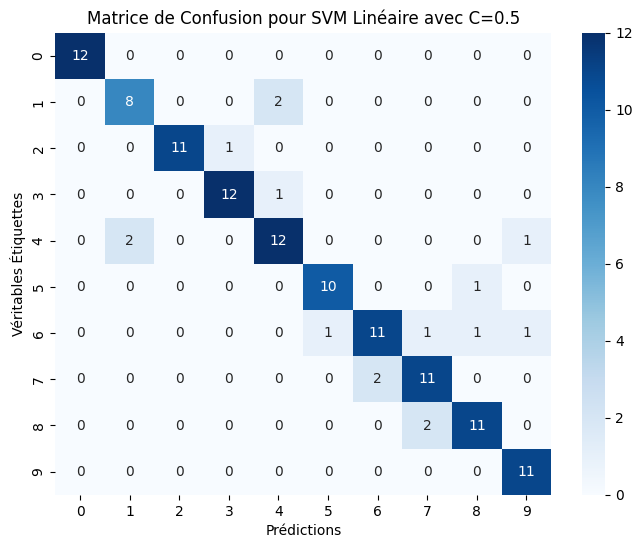

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df est votre DataFrame contenant les données
X = df[[f"MFCC_{i}" for i in range(1, 11)]].values  # Caractéristiques (MFCCs)
y = df['SpeakerID'].values  # Étiquettes (speaker_id)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.25)

# Initialiser le modèle SVM linéaire avec C=0.5
svm_linear = SVC(C=0.3, kernel='linear', random_state=0)

# Entraîner le modèle
svm_linear.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm_linear.predict(X_test)

# Afficher le rapport de classification
print("Rapport de Classification pour SVM Linéaire (C=0.5):\n", classification_report(y_test, y_pred))

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matrice de Confusion pour SVM Linéaire avec C=0.5')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()


#### Bonus: Enrichissez le dataset avec des enregistrements de votre propre voix. Le modèle est-il capable de vous reconnaitre ?

In [112]:
import sounddevice as sd
from scipy.io.wavfile import write

# Définir les paramètres de l'enregistrement
sample_rate = 44100  # Fréquence d'échantillonnage (Hz)
duration = 5         # Durée de l'enregistrement (en secondes)
filename = "enregistrement51.wav"  # Nom du fichier de sortie

# Capturer l'audio
print("Enregistrement en cours...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2)
sd.wait()  # Attendre la fin de l'enregistrement
print("Enregistrement terminé.")

# Sauvegarder l'audio dans un fichier .wav
write(filename, sample_rate, audio_data)
print(f"Fichier audio sauvegardé sous le nom : {filename}")


Enregistrement en cours...
Enregistrement terminé.
Fichier audio sauvegardé sous le nom : enregistrement51.wav


In [72]:
import os

# Dossier contenant les fichiers audio
folder_name = "data_v2"
# Préfixe pour le nouveau nom de fichier
prefix = "m0006_us_m0006"

# Lister les fichiers dans le dossier et les trier
files = sorted(os.listdir(folder_name))

# Renommer chaque fichier
for index, filename in enumerate(files, start=1):
    # Générer le nouveau nom de fichier avec un suffixe numérique à cinq chiffres
    new_name = f"{prefix}_{index:05}.wav"
    # Chemin complet des fichiers d'origine et de destination
    old_path = os.path.join(folder_name, filename)
    new_path = os.path.join(folder_name, new_name)
    
    # Renommer le fichier
    os.rename(old_path, new_path)
    print(f"{filename} a été renommé en {new_name}")


enregistrement1.wav a été renommé en m0006_us_m0006_00001.wav
enregistrement10.wav a été renommé en m0006_us_m0006_00002.wav
enregistrement11.wav a été renommé en m0006_us_m0006_00003.wav
enregistrement12.wav a été renommé en m0006_us_m0006_00004.wav
enregistrement13.wav a été renommé en m0006_us_m0006_00005.wav
enregistrement14.wav a été renommé en m0006_us_m0006_00006.wav
enregistrement15.wav a été renommé en m0006_us_m0006_00007.wav
enregistrement16.wav a été renommé en m0006_us_m0006_00008.wav
enregistrement17.wav a été renommé en m0006_us_m0006_00009.wav
enregistrement18.wav a été renommé en m0006_us_m0006_00010.wav
enregistrement19.wav a été renommé en m0006_us_m0006_00011.wav
enregistrement2.wav a été renommé en m0006_us_m0006_00012.wav
enregistrement20.wav a été renommé en m0006_us_m0006_00013.wav
enregistrement21.wav a été renommé en m0006_us_m0006_00014.wav
enregistrement22.wav a été renommé en m0006_us_m0006_00015.wav
enregistrement23.wav a été renommé en m0006_us_m0006_0001

In [76]:
import pandas as pd
import librosa

folder_path = "data_v2/"
n_recordings = 50
n_coefs = 10
data = []

# Utiliser 6 locuteurs pour 'm' et 5 locuteurs pour 'f'
for gender, n_speakers in zip(["m", "f"], [6, 5]):
    for speaker in range(1, n_speakers + 1):
        for recording_id in range(1, n_recordings + 1):
            # Générer le nom du fichier
            file_name = "%s%04d_us_%s%04d_%05d.wav" % (gender, speaker, gender, speaker, recording_id)
            
            # Charger le fichier audio et extraire les caractéristiques MFCC
            y, sr = librosa.load(folder_path + file_name)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coefs).mean(axis=1)
            
            # Déterminer l'ID du locuteur
            speaker_id = speaker - 1
            if gender == "f":
                speaker_id += 6  # Décaler l'ID pour les locuteurs féminins

            # Créer une ligne de données
            row_data = {
                'FileName': file_name,
                'Gender': gender,
                'SpeakerID': speaker_id,
                'RecordingID': recording_id,
            }
            # Ajouter chaque coefficient MFCC à la ligne
            for i in range(n_coefs):
                row_data[f'MFCC_{i+1}'] = mfcc[i]
            
            # Ajouter la ligne aux données
            data.append(row_data)

# Créer un DataFrame à partir des données
df = pd.DataFrame(data)


In [78]:
df

,FileName,Gender,SpeakerID,RecordingID,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10
0,m0001_us_m0001_00001.wav,m,0,1,-432.045410,119.769264,-3.836545,25.336601,-13.802796,16.731417,-2.733351,2.620322,-9.290769,3.606286
1,m0001_us_m0001_00002.wav,m,0,2,-448.635986,114.177414,-5.153250,16.764275,-20.626694,20.666159,-5.741007,9.305303,-5.688131,0.833428
2,m0001_us_m0001_00003.wav,m,0,3,-433.696320,94.268814,-3.704444,24.321095,-15.773800,16.456261,0.998079,5.189481,-8.003875,4.879942
3,m0001_us_m0001_00004.wav,m,0,4,-427.338989,113.769791,-8.063370,25.546103,-15.735123,12.846508,-0.483539,5.328898,-16.783321,1.889776
4,m0001_us_m0001_00005.wav,m,0,5,-412.676575,102.270454,-9.136461,29.005512,-12.034924,23.754642,-7.142555,-0.976251,-14.627462,3.513205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,f0005_us_f0005_00046.wav,f,10,46,-467.029236,90.769936,-14.992499,56.656349,-12.021296,-0.570868,-18.959066,2.067918,-13.606144,-3.065059
546,f0005_us_f0005_00047.wav,f,10,47,-514.380920,78.621109,3.196579,35.015747,-6.198997,2.286488,-11.536990,2.881445,-7.794378,3.898638
547,f0005_us_f0005_00048.wav,f,10,48,-509.075989,84.645447,0.925817,39.313381,-4.539386,7.217256,-12.551515,3.953387,-6.506525,3.453084
548,f0005_us_f0005_00049.wav,f,10,49,-534.780701,80.629089,2.279420,34.447704,-3.904471,1.276328,-7.786647,2.566420,-6.287343,1.145256


In [79]:
from sklearn.model_selection import train_test_split

X = df[[f"MFCC_{i}" for i in range(1, 11)]].values
y = df.SpeakerID.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.25)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Normaliser les caractéristiques MFCC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le SVM avec kernel linéaire et C=0.5
svm_model = SVC(kernel='linear', C=0.5)
svm_model.fit(X_train, y_train)

# Prédire les étiquettes pour l'ensemble de test
y_pred = svm_model.predict(X_test)

# Générer et afficher le rapport de classification
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", report)


Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.80      0.80        10
           2       0.86      0.92      0.89        13
           3       0.82      0.75      0.78        12
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       0.80      1.00      0.89        12
           7       0.80      0.67      0.73        12
           8       1.00      0.94      0.97        16
           9       0.89      1.00      0.94        16
          10       1.00      0.86      0.92        14

    accuracy                           0.91       138
   macro avg       0.91      0.90      0.90       138
weighted avg       0.91      0.91      0.90       138



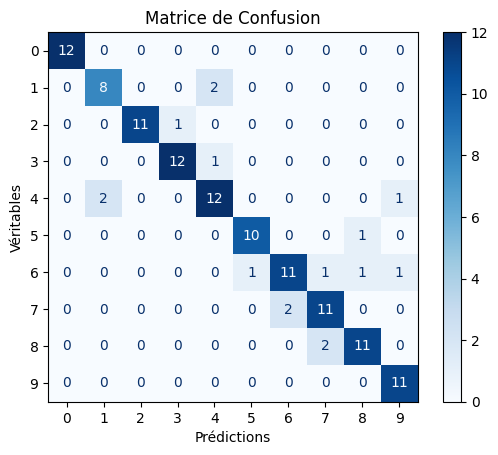

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.show()
